In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

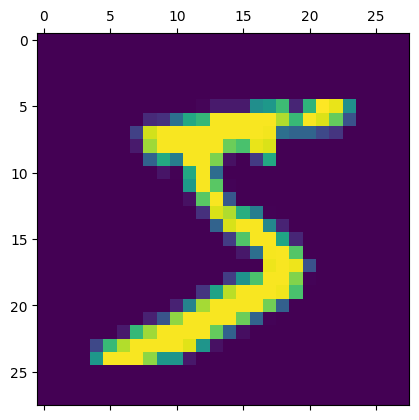

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.2676 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1207 - accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0838 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0632 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0393 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0339 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.01

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9765


[0.08472377061843872, 0.9764999747276306]

In [10]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(y_test.shape)
print(y_pred[0])

313/313 [==============================] - 1s 2ms/step
(10000,)
7


In [11]:
cm = tf.math.confusion_matrix(y_test,y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    1,    1,    0,    1,    1,    2,    0],
       [   1, 1126,    3,    0,    0,    0,    2,    0,    3,    0],
       [   6,    1,  998,    2,    4,    0,    1,   10,   10,    0],
       [   0,    0,    0,  976,    0,    7,    0,    7,   13,    7],
       [   2,    0,    4,    0,  962,    0,    3,    3,    1,    7],
       [   3,    1,    0,    5,    1,  869,    1,    2,    9,    1],
       [  10,    3,    1,    1,    3,    6,  931,    0,    3,    0],
       [   0,    5,    6,    1,    3,    0,    0, 1004,    3,    6],
       [   8,    0,    2,    2,    0,    2,    1,    5,  953,    1],
       [   4,    4,    1,    1,    9,    4,    0,    9,    4,  973]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual Values')

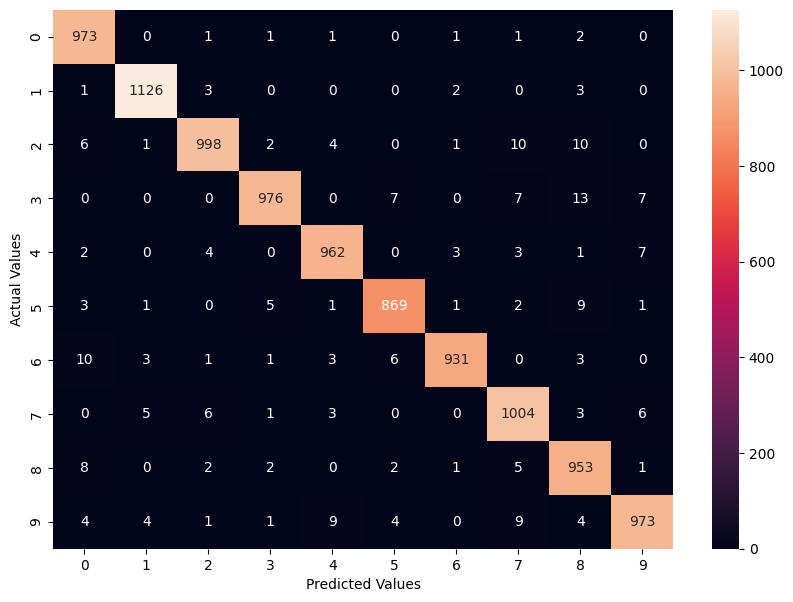

In [12]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [13]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [17]:
model = keras.Sequential([

    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.1612 - accuracy: 0.9516
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0558 - accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0357 - accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0173 - accuracy: 0.9947


In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0457 - accuracy: 0.9872


[0.04572713375091553, 0.9872000217437744]

In [21]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(y_test.shape)
print(y_pred[0])

313/313 [==============================] - 1s 2ms/step
(10000,)
7


In [22]:
cm = tf.math.confusion_matrix(y_test,y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    0,    0,    1,    4,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   0,    2, 1023,    1,    1,    0,    0,    5,    0,    0],
       [   0,    0,    3, 1002,    0,    2,    0,    2,    1,    0],
       [   0,    0,    2,    0,  969,    0,    1,    1,    1,    8],
       [   0,    0,    0,    4,    0,  887,    1,    0,    0,    0],
       [   5,    3,    1,    2,    1,    3,  943,    0,    0,    0],
       [   0,    2,   11,    0,    0,    0,    0, 1014,    1,    0],
       [   3,    1,    5,    3,    0,    9,    1,    2,  947,    3],
       [   0,    2,    0,    4,    6,    9,    0,    5,    2,  981]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual Values')

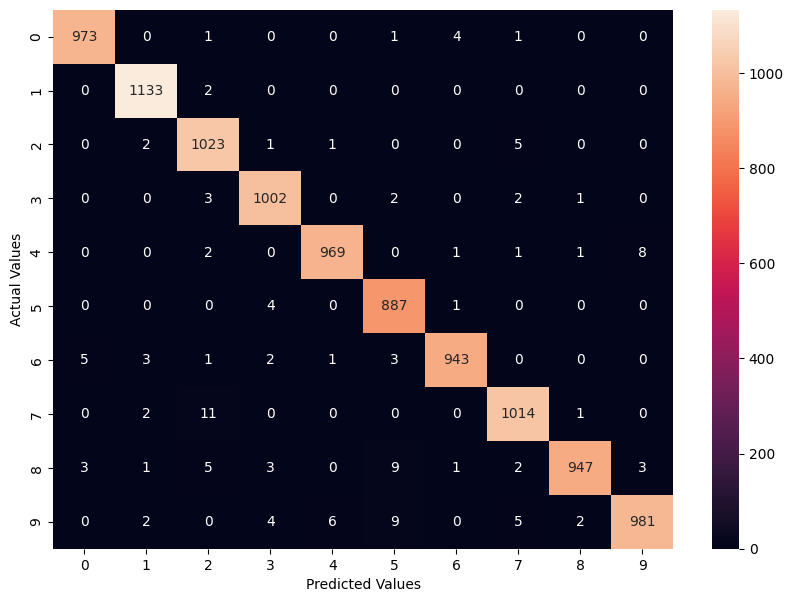

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')